In [1]:
#importing libraries
import numpy as np
import random
import matplotlib.pylab as plt
import warnings

### Generating 2D Gaussian Random Samples for training dataset

In [2]:
mu1, mu2 = np.array([1,0]), np.array([0,1])
cov1, cov2 = np.array([[1,0.75],[0.75,1]]), np.array([[1,0.5],[-0.5,1]])

#Gaussian random sample1
random.seed(123)
num1 = np.random.multivariate_normal(mu1,cov1,200)

#Gaussian random sample2
random.seed(123)
num2 = np.random.multivariate_normal(mu2,cov2,200)

#labeling training dataset with 0 and 1
label_0, label_1 = np.zeros((num1.shape[0],1)), np.ones((num2.shape[0],1))

target = np.concatenate((label_0,label_1))

train = np.concatenate((num1, num2))
np.random.shuffle(train)

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_42000/2596830470.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  num2 = np.random.multivariate_normal(mu2,cov2,200)


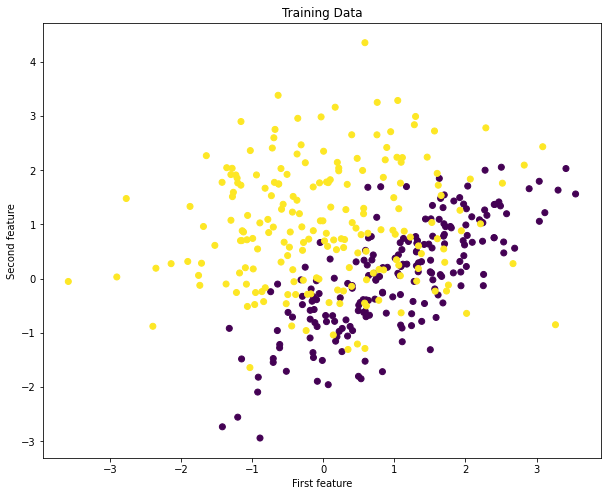

In [3]:
# Plotting actual data
fig = plt.figure(figsize=(10,8))
X = []
X += [list(i) for i in num1]
X += [list(i) for i in num2]
X=np.array(X)
y = [0]*len(num1) + [1]*len(num2) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Training Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Generating 2D Gaussian Random Samples for test dataset

In [4]:
mu1=np.array([1,0])
cov1=np.array([[1,0.75],[0.75,1]])

rand1=np.array(np.random.multivariate_normal(mu1,cov1,50))
rand2=np.array(np.random.multivariate_normal(mu2,cov2,50))

#lableling dataset with 0 and 1
label_0 = np.zeros((rand1.shape[0],1))
label_1 = np.ones((rand2.shape[0],1))
test = np.concatenate((rand1,rand2))
y_test = np.concatenate((label_0,label_1))
np.random.shuffle(test)

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_42000/3511501189.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  rand2=np.array(np.random.multivariate_normal(mu2,cov2,50))


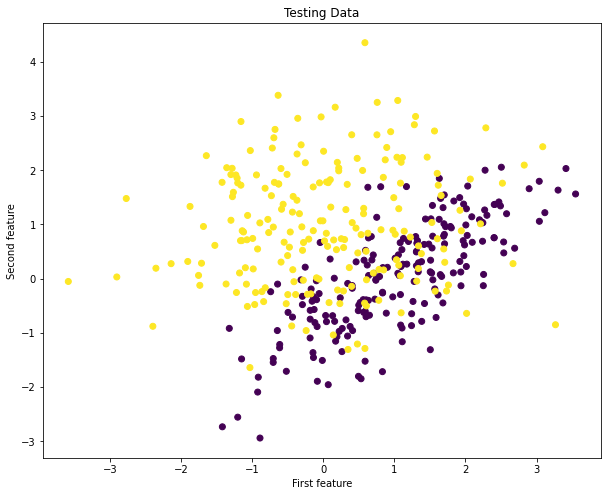

In [5]:
# Plotting actual data
fig = plt.figure(figsize=(10,8))
X = []
X += [list(i) for i in num1]
X += [list(i) for i in num2]
X = np.array(X)
y = [0]*len(num1) + [1]*len(num2) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Testing Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## KNN Algorithm

In [6]:
class KNN():

    def __init__(self,k=3):
        self.k = k
        
    def euclidean(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
            
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.array([self._predict(x) for x in X])
        output = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]).tolist()
        predict=[]
        
        for i in range(len(output)):
            prediction=max(set(output[i]),key=output.count)
            predict.append(prediction)
        prediction = np.array(predict)
        return prediction
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean(x,x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        return k_neighbor_labels
    
    def accuracy(self,y_test,predicted):
        if y_test.shape!= predicted.shape: y_test = y_test.reshape(len(predicted),)
        return np.sum(y_test==predicted)/len(y_test)

In [7]:
knn = KNN(k=3)
knn.fit(train,target)

In [8]:
predicted = knn.predict(test)

In [9]:
from collections import Counter

In [10]:
knn.accuracy(y_test,predicted)

0.47

### Testing the Model

In [11]:
#calculating accuracies for different k
accuracy=[]
range_for_k=[1,2,3,4,5,10,20]
for k in range_for_k:
    knn = KNN(k=k)
    knn.fit(train,target)
    predictions=knn.predict(test)
    accuracy.append(knn.accuracy(y_test,predictions))
print(accuracy)

[0.46, 0.47, 0.47, 0.5, 0.5, 0.5, 0.5]


In [12]:
#nearest_neighbor(train,test,3)

### K Vs Accuracy

Text(0.5, 1.0, 'Accuracy of KNN for differnt k Values')

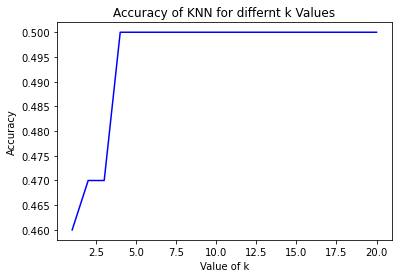

In [13]:
plt.plot(range_for_k,accuracy,color='b')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN for differnt k Values')

# Problem 2 b

### Generating 2D Gaussian Data

In [14]:
mu1=np.array([1,0])
cov1=np.array([[1,0.75],[0.75,1]])

#generating gaussian numbers
train=np.random.multivariate_normal(mu1,cov1,300)
test=np.random.multivariate_normal(mu1,cov1,100)
guass_noise=np.random.normal(0,0.5)
train_data=[]
test_data=[]
for guass_num in train:
    train_set=2*guass_num[0]+guass_num[1]+guass_noise
    train_data.append(train_set)
for guass_num in test:
    test_set=2*guass_num[0]+guass_num[1]+guass_noise
    test_data.append(test_set)

#Dataset for training and testing algorithm
train_data=(np.array(train_data)).reshape(len(train_data),1)
test_data=(np.array(test_data)).reshape(len(test_data),1)

In [15]:
train_sample=np.append(train,train_data,axis=1)
test_sample=np.append(test,test_data,axis=1)
#X_train,y_train=train_sample[:,:2],train_sample[:,2]
#X_test,y_test=test_sample[:,:2],test_sample[:,2]

### KNN Regression Algorithm

In [16]:
def euclidean(x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

def myknnregress(train,test,k):
    distances=[]
    for train_row in train:
        dist=euclidean(test,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda distances:distances[1])
    average=[]
    for i in range(k):
        average.append(distances[i][-1])
    return (np.sum(average))/len(average)
def get_accuracy(train_sample,test_sample,k):
    sse=0
    for test in test_sample:
        predicted=myknnregress(train_sample,test,k)
        sse+=(predicted-test[-1])**2
    return np.sqrt(sse/len(test_sample))

### Testing KNN Reg Algorithm for different k values

In [17]:
list_k=[1, 2, 3, 5, 10, 20, 50, 100]
acc=[]
for k in list_k:
    accu=get_accuracy(train_sample,test_sample,k)
    acc.append(accu)
print(acc)

[3.171738561343743, 3.1622168034784766, 3.1563342803063903, 3.135249828681404, 3.1046117589183324, 3.0565366533837044, 2.9826297246819076, 2.972596735283931]


##### k vs Accuarcy 

Text(0.5, 1.0, 'RSME of KNN Reg for differnt k Values')

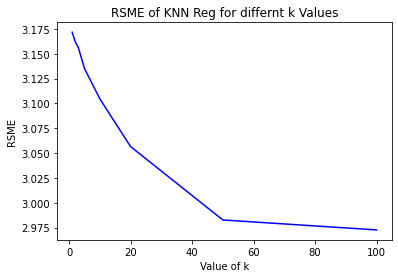

In [18]:
plt.plot(list_k,acc,color='b')
plt.xlabel('Value of k')
plt.ylabel('RSME')
plt.title('RSME of KNN Reg for differnt k Values')

## Problem 2 c

In [19]:
train_sample=np.append(train,train_data,axis=1)
test_sample=np.append(test,test_data,axis=1)
X_train,y_train=train_sample[:,:2],train_sample[:,2]
X_test,y_test=test_sample[:,:2],test_sample[:,2]

In [20]:
#Calculating Beta Values 
dot_product=np.dot(X_train.transpose(),X_train)
inverse=np.linalg.inv(dot_product)
beta_values=np.dot(inverse,X_train.transpose())
final=np.dot(beta_values,y_train)

In [21]:
#prediction
prediction=np.dot(X_test,final)

In [22]:
def euclidean_distance(row1,row2):
    distance=[]
    for i in range(len(row1)-1):
        euclidean_distance=np.sqrt(np.sum((row1[i]-row2[i])**2))
        distance.append(euclidean_distance)
    return distance
def myknnregress(train,test,k):
    distances=[]
    for train_row in train:
        dist=euclidean_distance(test,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda distances:distances[1])
    average=[]
    for i in range(k):
        average.append(distances[i][-1])
    return (np.sum(average))/len(average)
def get_accuracy(train_sample,test_sample,k):
    lse=0
    for test in test_sample:
        predicted=myknnregress(train_sample,test,k)
        lse+=(predicted-test[-1])
    return lse

In [23]:
#Calculating accuracy
list_k=[1, 2, 3, 5, 10, 20, 50, 100]
acc=[]
for k in list_k:
    accu=get_accuracy(X_train,X_test,k)
    acc.append(accu)
print(acc)

[-4.366210205859545, -3.8983031605741205, -3.409401726898828, -2.4322949950723705, 0.06855197804931168, 4.233422121001416, 15.726073609952977, 33.946171631009754]


Text(0.5, 1.0, 'LSE of KNN Reg for differnt k Values')

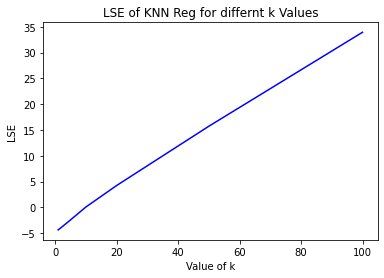

In [24]:
plt.plot(list_k,acc,color='b')
plt.xlabel('Value of k')
plt.ylabel('LSE')
plt.title('LSE of KNN Reg for differnt k Values')